In [6]:
pip install geopandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [14]:
import pandas as pd
from pyspark.sql.functions import col,split,concat,size
import re
import pyspark
import geopandas
import matplotlib.pyplot as plt

In [15]:
data = sc.textFile("s3://geocluster/Data/sample_geo2.txt")
df=data.map(lambda x: (re.split('[\t]',x))).cache()



In [16]:
df=df.filter(lambda x:len(x)!=1)


In [17]:
df=df.filter(lambda x:x[0]!='Latitude')


In [30]:
df=df.map(lambda x:(float(x[0]),float(x[1]),float(x[2])))
df.collect()

[(37.77253945, -77.49954987, 1.0),
 (42.09013298, -87.68915558, 2.0),
 (39.56341754, -75.58753204, 3.0),
 (39.45302347, -87.69374084, 4.0),
 (38.9537989, -77.01656342, 5.0),
 (39.90031211, -75.74486542, 6.0),
 (36.24009843, -115.1586914, 7.0),
 (26.11330818, -80.09202576, 8.0),
 (34.27036086, -118.3162918, 9.0),
 (38.81664153, -97.62573242, 10.0),
 (33.67614531, -118.1892776, 11.0),
 (28.74612042, -81.44248199, 12.0),
 (38.35152702, -81.69611359, 13.0),
 (39.57271402, -86.35784912, 14.0),
 (30.19543489, -81.45937347, 15.0),
 (40.49826888, -74.16846466, 16.0),
 (34.05601838, -117.9957428, 17.0),
 (38.14426403, -122.5368347, 18.0),
 (38.92940099, -94.39599609, 19.0),
 (39.51639552, -77.81656647, 20.0),
 (29.19432608, -81.04883575, 21.0),
 (41.30755919, -73.79240417, 22.0),
 (42.38698723, -70.92178345, 23.0),
 (41.95435347, -83.66780853, 24.0),
 (33.75833444, -117.2264633, 25.0),
 (38.70400011, -77.17221832, 26.0),
 (27.11794142, -80.29223633, 27.0),
 (42.72659007, -73.8391571, 28.0),
 (3

In [19]:
df2 = sqlContext.createDataFrame(data=df)
#converting to dataframe

In [20]:
df2.show(10)

+-----------+------------+----+
|         _1|          _2|  _3|
+-----------+------------+----+
|37.77253945|-77.49954987| 1.0|
|42.09013298|-87.68915558| 2.0|
|39.56341754|-75.58753204| 3.0|
|39.45302347|-87.69374084| 4.0|
| 38.9537989|-77.01656342| 5.0|
|39.90031211|-75.74486542| 6.0|
|36.24009843|-115.1586914| 7.0|
|26.11330818|-80.09202576| 8.0|
|34.27036086|-118.3162918| 9.0|
|38.81664153|-97.62573242|10.0|
+-----------+------------+----+
only showing top 10 rows



In [21]:
df2=df2.select(concat('_1').alias("latitude"),concat('_2').alias("longitude"),concat('_3').alias("locationID"))
#Naming the coloumns

In [22]:
df2.show(10)

+-----------+------------+----------+
|   latitude|   longitude|locationID|
+-----------+------------+----------+
|37.77253945|-77.49954987|       1.0|
|42.09013298|-87.68915558|       2.0|
|39.56341754|-75.58753204|       3.0|
|39.45302347|-87.69374084|       4.0|
| 38.9537989|-77.01656342|       5.0|
|39.90031211|-75.74486542|       6.0|
|36.24009843|-115.1586914|       7.0|
|26.11330818|-80.09202576|       8.0|
|34.27036086|-118.3162918|       9.0|
|38.81664153|-97.62573242|      10.0|
+-----------+------------+----------+
only showing top 10 rows



In [23]:
df2=df2.filter(df2.latitude!=0)
df2=df2.filter(df2.longitude!=0)

In [24]:
df2.show(10)

+-----------+------------+----------+
|   latitude|   longitude|locationID|
+-----------+------------+----------+
|37.77253945|-77.49954987|       1.0|
|42.09013298|-87.68915558|       2.0|
|39.56341754|-75.58753204|       3.0|
|39.45302347|-87.69374084|       4.0|
| 38.9537989|-77.01656342|       5.0|
|39.90031211|-75.74486542|       6.0|
|36.24009843|-115.1586914|       7.0|
|26.11330818|-80.09202576|       8.0|
|34.27036086|-118.3162918|       9.0|
|38.81664153|-97.62573242|      10.0|
+-----------+------------+----------+
only showing top 10 rows



In [25]:
df2=df2.toPandas();
df2.to_csv('s3://geocluster/Data/sample_geo2.csv',header=None)
#converting to csv files

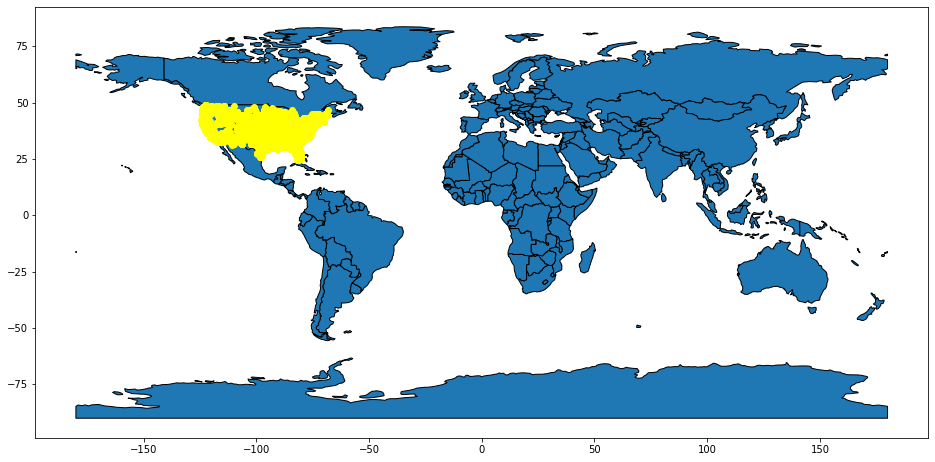

In [26]:
gdf = geopandas.GeoDataFrame(
    df2, geometry=geopandas.points_from_xy(df2.longitude, df2.latitude))


world_map= geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

#restricted to South America.
ax = world_map.plot(
    edgecolor='black',figsize=(16,16))

#Plotting
gdf.plot(ax=ax,color='yellow')

plt.show()